# **Assignment 1 - Language Models**
#### **Due: September 27 (Tuesday), 2022**

## **Notes**

### **Introduction**

Welcome to CSE 527A. The goal for the first assignment is to make sure you are familiar with all the tools you need to complete the programming assignments for the course. 

Each assignment contains two parts: a written and coding portion. The coding portion for each homework assignment will be delivered through a Colaboratory notebook such as this one. Please use as many as code and markdown cells to run and explain all the steps you took in order to answer each question.

### **Comments/Documentation**

Please follow PEP 8 style guidelines (https://peps.python.org/pep-0008/) for commenting your code. Furthermore, please remember to manually save your work once in a while. If you are connected to a hosted runtime that if for whatever reason it disconnects you will have to rerun all connected code cells.

### **Getting Started**

In order to compile code efficiently please pay attention to if you are using a hardware accelerator or not. If you are directly calling libraries like Tensorflow, Keras, or Pytorch, it is advised to switch to a GPU.

To access a GPU, go to `Edit->Notebook settings` and in the `Hardware accelerator` dropdown choose `GPU`. 
As soon as you run a code cell, you will be connected to a cloud instance with a GPU.
Try running the code cell below to check that a GPU is connected (select the cell then either click the play button at the top left or press `Ctrl+Enter` or `Shift+Enter`).

The free version of Google Colab will provide the necessary hardware for this course. Please keep in mind the RAM and Disk Space that you are allocated and that you are not given an infinite active runtime.

If your local machine has a GPU that you find outperforms the cloud GPU then you can follow the necessary documentation to use a GPU with your environment.

### **Lost GPU/TPU Access on Colab**

If you are not allocated a GPU or cannot connect to a GPU (limits are reached for Collab), Kaggle also provides free access to GPUs and TPUs. Please transfer your work to a Kaggle runtime instance by downloading your file on Colab as a '.ipynb' file and importing the file into Kaggle.

### **Submission Instructions**

We will use Gradescope for assignment submission. You can upload files individually or as part of a zip file, but if using a zip file be sure you are zipping the files directly and not a folder that contains them. Please note if designated output is cleared, you will receive a 0.

To download this notebook, go to `File->Download .ipynb`.  Please rename the file to match the name in our file list. 

When submitting your ipython notebooks, make sure everything runs correctly if the cells are executed in order starting from a fresh session.  Note that just because a cell runs in your current session doesn't mean it doesn't rely on code that you have already changed or deleted.  If the code doesn't take too long to run, we recommend re-running everything with `Runtime->Restart and run all...`.

When you upload your submission to the Gradescope assignment, you should get immediate feedback that confirms your submission was processed correctly. Note that Gradesope will allow you to submit multiple times before the deadline, and we will use the latest submission for grading.

## **Setup**

In [1]:
'''
from google.colab import drive # one option to load datasets
from google.colab import files
drive.mount('/content/gdrive')
'''
!nvidia-smi -L # check if using GPU


GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-35eed1fb-7762-c2be-cd6a-7556b93b5b33)


## **Problem 1**

## **1.1**

Write a program to compute unsmoothed unigrams, bigrams, and trigrams (you may not import nltk).

In [2]:
## your code here
import time

def ngram(n,text): #generic N gram
  text = text.split()
  ngrams = {}
  # generate ngram by sliding window
  i,j = 0,n
  while j <= len(text):
    if n==1:
      ngrams[text[i]] = ngrams.get(text[i],0)+1
    else:
      ngrams[tuple(text[i:j])] = ngrams.get(tuple(text[i:j]),0)+1
    i+=1

    j+=1
  return ngrams

def unigram(text):
  return ngram(1,text)

def bigram(text):
  return ngram(2,text)

def trigram(text):
  return ngram(3,text)


## test the above code
print('unigrams=',unigram('asdf.g hjk hohoh'))
#print('unigrams=',unigram('a'))
print('bigrams=',bigram(('Valkyria Chronicles III Senjō no Valkyria 3   Chronicles  Japanese  戦場のヴァルキュリア3  lit  Valkyria of the')))
#print('bigrams=',bigram(('a')))
print('trigrams=',trigram(('asdf.g hjk hohoh')))


unigrams= {'asdf.g': 1, 'hjk': 1, 'hohoh': 1}
bigrams= {('Valkyria', 'Chronicles'): 1, ('Chronicles', 'III'): 1, ('III', 'Senjō'): 1, ('Senjō', 'no'): 1, ('no', 'Valkyria'): 1, ('Valkyria', '3'): 1, ('3', 'Chronicles'): 1, ('Chronicles', 'Japanese'): 1, ('Japanese', '戦場のヴァルキュリア3'): 1, ('戦場のヴァルキュリア3', 'lit'): 1, ('lit', 'Valkyria'): 1, ('Valkyria', 'of'): 1, ('of', 'the'): 1}
trigrams= {('asdf.g', 'hjk', 'hohoh'): 1}


The above function calculates different ngrams with frequency. It will be used in the following sections

## **1.2**

Train your model on the Wikitext-2-v1 training corpus (https://huggingface.co/datasets/wikitext). Explain the differences between your most common unigrams, bigrams, trigrams (pad beginning and end of your sentences and please remove puncutation and unknown tokens from corpus).


In [3]:
## your code here

#install datasets if necessary
!pip install datasets

In [4]:

from datasets import load_dataset
dataset = load_dataset('wikitext', 'wikitext-2-v1', split =['train','validation','test'])

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Dataset wikitext downloaded and prepared to /root/.cache/huggingface/datasets/wikitext/wikitext-2-v1/1.0.0/a241db52902eaf2c6aa732210bead40c090019a499ceb13bcbfa3f8ab646a126. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Below function remove the punctuation and unknown tokens from the dataset.

In [5]:
import string



def remove_unk_punctuation(data):
  '''
  remove <unk> and punctuations
  '''

  prepared_data = ""
  for token in  data:
    
    current_string = token['text'].strip().replace("<unk>", "").translate(token['text'].maketrans('', '', string.punctuation))
    if current_string!="":
      # if not empty string, concate
      prepared_data+=current_string

  return prepared_data

train = remove_unk_punctuation(dataset[0])
validation = remove_unk_punctuation(dataset[1])
test = remove_unk_punctuation(dataset[2])



Below function sort the ngrams based on frequency. It will be helpful to get the most common ngrams.

In [6]:
import collections
def sorted_ngrams(n,text):
  ngrams = ngram(n,text)
  ngrams_sorted = dict(sorted(ngrams.items(), key=lambda item: item[1],reverse = True))
  top_ngrams = []
  for key in ngrams_sorted.keys():
    top_ngrams.append(key)
  return  top_ngrams

frequency_sorted_unigram = sorted_ngrams(1,train)
frequency_sorted_bigram = sorted_ngrams(2,train)
frequency_sorted_trigram = sorted_ngrams(3,train)




Below is the 10 most frequent unigram, bigram and trigrams. If we comapare different n-grams we can see that with more n grams we are getting more meaningful data.

In [7]:
print('most frequent unigram=',frequency_sorted_unigram[:10])
print('most frequent bigram=',frequency_sorted_bigram[:10])
print('most frequent trigram=',frequency_sorted_trigram[:10])

most frequent unigram= ['the', 'of', 'and', 'in', 'to', 'a', 'was', 'The', 's', 'that']
most frequent bigram= [('of', 'the'), ('in', 'the'), ('to', 'the'), ('and', 'the'), ('on', 'the'), ('for', 'the'), ('from', 'the'), ('at', 'the'), ('by', 'the'), ('as', 'a')]
most frequent trigram= [('one', 'of', 'the'), ('the', 'United', 'States'), ('as', 'well', 'as'), ('part', 'of', 'the'), ('the', 'end', 'of'), ('end', 'of', 'the'), ('in', 'the', 'United'), ('a', 'number', 'of'), ('at', 'the', 'time'), ('known', 'as', 'the')]


## **1.3**

Calculate the perplexity for each n-gram (unigram, bigram, and trigram) on all splits (traning, validataion, test sets of Wikitext-2). And, without writing code, discuss what might happen to the perplexity if you continue to increase the number of words in your n-gram (4-gram, 5-gram, etc.)?

In [8]:
ngram_time=[]
ngram_training_start_time = time.time()
unigram_train_count = ngram(1,train)
ngram_time.append(time.time()-ngram_training_start_time)
ngram_training_start_time = time.time()
bigram_train_count = ngram(2,train)
ngram_time.append(time.time()-ngram_training_start_time)
ngram_training_start_time = time.time()
trigram_train_count = ngram(3,train)
ngram_time.append(time.time()-ngram_training_start_time)
 

unigram_test_count = ngram(1,test)
bigram_test_count = ngram(2,test)
trigram_test_count = ngram(3,test)

unigram_validation_count = ngram(1,validation)
bigram_validation_count = ngram(2,validation)
trigram_validation_count = ngram(3,validation)

Above code calculates the ngram of all splits. It will be helpful top calculate the perplexity below.

In [9]:
import sys
import math

def compute_perplexity(text,n,ngram_trained_model,n_minus_one_trained_model=None):
  text = text.split()
  ngrams_list = []

  i,j = 0,n
  while j <= len(text):
    if n==1:
      ngrams_list.append(text[i])
    else:
      ngrams_list.append(tuple(text[i:j]))
    i+=1
    j+=1
  

  log_probability = 0
  probability = 1
  if n==1:
    #ngram_trained_model = unigram_train_count
    total_unigram = sum(ngram_trained_model.values())
    for token in ngrams_list:
    #if token in trained_model:
      log_probability+=math.log(ngram_trained_model[token]/total_unigram,2)
      probability*=ngram_trained_model[token]/total_unigram


  elif n==2:
    #ngram_trained_model = bigram_train_count
    #n_minus_one_trained_model = unigram_train_count
    for token in ngrams_list:
      n_minus_one_token = token[0]
      log_probability+=math.log(ngram_trained_model[token]/n_minus_one_trained_model[n_minus_one_token],2)
      probability*=ngram_trained_model[token]/n_minus_one_trained_model[n_minus_one_token]
      


  elif n==3:
    #ngram_trained_model = trigram_train_count
    #n_minus_one_trained_model = bigram_train_count
    for token in ngrams_list:
      n_minus_one_token = token[:n-1]
      log_probability+=math.log(ngram_trained_model[token]/n_minus_one_trained_model[n_minus_one_token],2)
      probability*=ngram_trained_model[token]/n_minus_one_trained_model[n_minus_one_token]
  else:
    print("not implemented")
    sys.exit(1)

  

  
  #perplexity
  perplexity = math.pow(2,-log_probability/len(ngrams_list))

  
  


  



  return perplexity #, probability, math.pow(2,log_probability), log_probability
    




## test the above code
#print('unigrams=',text_probability('asdf.g hjk hohoh',1))
#print('unigrams=',text_probability('asdf.g hjk hohoh',2))
#print('unirams=',text_probability(('Valkyria Chronicles III Senjō no Valkyria 3   Chronicles  Japanese  戦場のヴァルキュリア3  lit  Valkyria of the'),1))
#print('bigrams=',text_probability(('Valkyria Chronicles III Senjō no Valkyria 3   Chronicles  Japanese  戦場のヴァルキュリア3  lit  Valkyria of the'),2))

#print(text_probability(train,1))
print('unigram train perplexity=',compute_perplexity(train,1,unigram_train_count))
print('bigram train perplexity=',compute_perplexity(train,2,bigram_train_count,unigram_train_count))
print('trigram train perplexity=',compute_perplexity(train,3,trigram_train_count,bigram_train_count))



unigram train perplexity= 1941.083712678701
bigram train perplexity= 97.34964861873617
trigram train perplexity= 5.429987233533894


From the above calculation, it appears trigram is better than bigram and bigram is better than unigram as expected and if I continue to increase the number of words in n-gram, it will be better. However, all the code so for is the unsmoothed version of n-gram. It will not work for validation and test data if the validation and test data have unseen word. So in the next section we will apply smoothing and show the result for both test and validation data.

## **1.4**

Enable Laplace smoothing and Add-K smoothing (0.1,0.05,0.01) to your code. Discuss the changes in perplexity values between n-grams as you try different smoothing methods/values.

In [10]:
## your code here


def prepare_for_smoothing(train_ngram_count,test_ngram_count,validation_ngram_count): 
  result=train_ngram_count.copy()
  for token in test_ngram_count:
    if token not in train_ngram_count:
      result[token]=0
  for token in validation_ngram_count:
    if token not in train_ngram_count:
      result[token]=0
  return result

def smoothing(train_count, k=0):
  result=train_count.copy()
  for token in train_count:
    result[token]+=k
  return result

## test the above code
#ngram(1,text)
toy_unigram_train=ngram(2,'asdf.g hjk hohoh')
toy_unigram_test=ngram(2,'asdf.g gg hjk fh hohoh')
toy_unigram_valid=ngram(2,'asdf.g hjk hohoh gg asdfg')
print(toy_unigram_train)
toy_unigram_train_forsmoothing=prepare_for_smoothing(toy_unigram_train,toy_unigram_test,toy_unigram_valid)
print(toy_unigram_train)
print(toy_unigram_train_forsmoothing)

toy_unigram_train_k_0=smoothing(toy_unigram_train_forsmoothing)
toy_unigram_train_k_1=smoothing(toy_unigram_train_forsmoothing,1)
toy_unigram_train_k_2=smoothing(toy_unigram_train_forsmoothing,2)
print(toy_unigram_train)
print(toy_unigram_train_forsmoothing)
print(toy_unigram_train_k_0)
print(toy_unigram_train_k_1)
print(toy_unigram_train_k_2)






{('asdf.g', 'hjk'): 1, ('hjk', 'hohoh'): 1}
{('asdf.g', 'hjk'): 1, ('hjk', 'hohoh'): 1}
{('asdf.g', 'hjk'): 1, ('hjk', 'hohoh'): 1, ('asdf.g', 'gg'): 0, ('gg', 'hjk'): 0, ('hjk', 'fh'): 0, ('fh', 'hohoh'): 0, ('hohoh', 'gg'): 0, ('gg', 'asdfg'): 0}
{('asdf.g', 'hjk'): 1, ('hjk', 'hohoh'): 1}
{('asdf.g', 'hjk'): 1, ('hjk', 'hohoh'): 1, ('asdf.g', 'gg'): 0, ('gg', 'hjk'): 0, ('hjk', 'fh'): 0, ('fh', 'hohoh'): 0, ('hohoh', 'gg'): 0, ('gg', 'asdfg'): 0}
{('asdf.g', 'hjk'): 1, ('hjk', 'hohoh'): 1, ('asdf.g', 'gg'): 0, ('gg', 'hjk'): 0, ('hjk', 'fh'): 0, ('fh', 'hohoh'): 0, ('hohoh', 'gg'): 0, ('gg', 'asdfg'): 0}
{('asdf.g', 'hjk'): 2, ('hjk', 'hohoh'): 2, ('asdf.g', 'gg'): 1, ('gg', 'hjk'): 1, ('hjk', 'fh'): 1, ('fh', 'hohoh'): 1, ('hohoh', 'gg'): 1, ('gg', 'asdfg'): 1}
{('asdf.g', 'hjk'): 3, ('hjk', 'hohoh'): 3, ('asdf.g', 'gg'): 2, ('gg', 'hjk'): 2, ('hjk', 'fh'): 2, ('fh', 'hohoh'): 2, ('hohoh', 'gg'): 2, ('gg', 'asdfg'): 2}


The above two functions do the smoothing task. These functions are pretty flexible. So we can do both laplace and k-smoothing. In below 2 cells I will prepare the data for this.

In [11]:

unigram_train_count_smoothing= prepare_for_smoothing(unigram_train_count,unigram_test_count,unigram_validation_count)
bigram_train_count_smoothing = prepare_for_smoothing(bigram_train_count,bigram_test_count,bigram_validation_count)
trigram_train_count_smoothing = prepare_for_smoothing(trigram_train_count,trigram_test_count,trigram_validation_count)

In [12]:
unigram_train_k_0=smoothing(unigram_train_count_smoothing)
bigram_train_k_0=smoothing(bigram_train_count_smoothing)
trigram_train_k_0=smoothing(trigram_train_count_smoothing)

#Laplace smoothing
unigram_train_k_laplace=smoothing(unigram_train_count_smoothing,1)
bigram_train_k_laplace=smoothing(bigram_train_count_smoothing,1)
trigram_train_k_laplace=smoothing(trigram_train_count_smoothing,1)

#k(0.1,0.05,0.01) smoothing 
unigram_train_k_1=smoothing(unigram_train_count_smoothing,0.1)
bigram_train_k_1=smoothing(bigram_train_count_smoothing,0.1)
trigram_train_k_1=smoothing(trigram_train_count_smoothing,0.1)

unigram_train_k_05=smoothing(unigram_train_count_smoothing,0.05)
bigram_train_k_05=smoothing(bigram_train_count_smoothing,0.05)
trigram_train_k_05=smoothing(trigram_train_count_smoothing,0.05)

unigram_train_k_01=smoothing(unigram_train_count_smoothing,0.01)
bigram_train_k_01=smoothing(bigram_train_count_smoothing,0.01)
trigram_train_k_01=smoothing(trigram_train_count_smoothing,0.01)

Now our data are ready for different types of smoothing. The results are shown below.

In [13]:
print('No smoothing. The train performance should be same as problem 1.3')
print('..train..')
print("unigram perplexity=",compute_perplexity(train,1,unigram_train_k_0))
print("bigram perplexity=",compute_perplexity(train,2,bigram_train_k_0,unigram_train_k_0))
print("trigram perplexity=",compute_perplexity(train,3,trigram_train_k_0,bigram_train_k_0))



No smoothing. The train performance should be same as problem 1.3
..train..
unigram perplexity= 1941.083712678701
bigram perplexity= 97.34964861873617
trigram perplexity= 5.429987233533894


In [14]:
print("......lapalce smooting performance.......")
unigram_test_perplexity = []
bigram_test_perplexity = []
trigram_test_perpplexity = []
print('..train..')
print("unigram perplexity=",compute_perplexity(train,1,unigram_train_k_laplace))
print("bigram perplexity=",compute_perplexity(train,2,bigram_train_k_laplace,unigram_train_k_laplace))
print("trigram perplexity=",compute_perplexity(train,3,trigram_train_k_laplace,bigram_train_k_laplace))
print('..validation..')
print("unigram perplexity=",compute_perplexity(validation,1,unigram_train_k_laplace))
print("bigram perplexity=",compute_perplexity(validation,2,bigram_train_k_laplace,unigram_train_k_laplace))
print("trigram perplexity=",compute_perplexity(validation,3,trigram_train_k_laplace,bigram_train_k_laplace))
print('..test..')
unigram_test_perplexity.append(compute_perplexity(test,1,unigram_train_k_laplace))
bigram_test_perplexity.append(compute_perplexity(test,2,bigram_train_k_laplace,unigram_train_k_laplace))
trigram_test_perpplexity.append(compute_perplexity(test,3,trigram_train_k_laplace,bigram_train_k_laplace))

print("unigram perplexity=",compute_perplexity(test,1,unigram_train_k_laplace))
print("bigram perplexity=",compute_perplexity(test,2,bigram_train_k_laplace,unigram_train_k_laplace))
print("trigram perplexity=",compute_perplexity(test,3,trigram_train_k_laplace,bigram_train_k_laplace))


......lapalce smooting performance.......
..train..
unigram perplexity= 1943.6194148230973
bigram perplexity= 73.77607260148193
trigram perplexity= 4.176797835405882
..validation..
unigram perplexity= 1730.0201050331605
bigram perplexity= 110.30615567874555
trigram perplexity= 5.682695471903138
..test..
unigram perplexity= 1688.5167095041265
bigram perplexity= 111.17559751168041
trigram perplexity= 5.792542173852982


In [15]:
print("......k=0.1 smooting performance.......")

print('..train..')
print("unigram perplexity=",compute_perplexity(train,1,unigram_train_k_1))
print("bigram perplexity=",compute_perplexity(train,2,bigram_train_k_1,unigram_train_k_1))
print("trigram perplexity=",compute_perplexity(train,3,trigram_train_k_1,bigram_train_k_1))
print('..validation..')
print("unigram perplexity=",compute_perplexity(validation,1,unigram_train_k_1))
print("bigram perplexity=",compute_perplexity(validation,2,bigram_train_k_1,unigram_train_k_1))
print("trigram perplexity=",compute_perplexity(validation,3,trigram_train_k_1,bigram_train_k_1))
print('..test..')

unigram_test_perplexity.append(compute_perplexity(test,1,unigram_train_k_1))
bigram_test_perplexity.append(compute_perplexity(test,2,bigram_train_k_1,unigram_train_k_1))
trigram_test_perpplexity.append(compute_perplexity(test,3,trigram_train_k_1,bigram_train_k_1))

print("unigram perplexity=",compute_perplexity(test,1,unigram_train_k_1))
print("bigram perplexity=",compute_perplexity(test,2,bigram_train_k_1,unigram_train_k_1))
print("trigram perplexity=",compute_perplexity(test,3,trigram_train_k_1,bigram_train_k_1))

......k=0.1 smooting performance.......
..train..
unigram perplexity= 1941.1284835418628
bigram perplexity= 93.8621401417523
trigram perplexity= 5.233655962524139
..validation..
unigram perplexity= 1726.269501963434
bigram perplexity= 251.70034887595685
trigram perplexity= 14.707950555613726
..test..
unigram perplexity= 1684.858102481261
bigram perplexity= 251.96117101111764
trigram perplexity= 15.096859354326547


In [16]:
print("......k=0.05 smooting performance.......")

print('..train..')
print("unigram perplexity=",compute_perplexity(train,1,unigram_train_k_05))
print("bigram perplexity=",compute_perplexity(train,2,bigram_train_k_05,unigram_train_k_05))
print("trigram perplexity=",compute_perplexity(train,3,trigram_train_k_05,bigram_train_k_05))
print('..validation..')
print("unigram perplexity=",compute_perplexity(validation,1,unigram_train_k_05))
print("bigram perplexity=",compute_perplexity(validation,2,bigram_train_k_05,unigram_train_k_05))
print("trigram perplexity=",compute_perplexity(validation,3,trigram_train_k_05,bigram_train_k_05))
print('..test..')
unigram_test_perplexity.append(compute_perplexity(test,1,unigram_train_k_05))
bigram_test_perplexity.append(compute_perplexity(test,2,bigram_train_k_05,unigram_train_k_05))
trigram_test_perpplexity.append(compute_perplexity(test,3,trigram_train_k_05,bigram_train_k_05))

print("unigram perplexity=",compute_perplexity(test,1,unigram_train_k_05))
print("bigram perplexity=",compute_perplexity(test,2,bigram_train_k_05,unigram_train_k_05))
print("trigram perplexity=",compute_perplexity(test,3,trigram_train_k_05,bigram_train_k_05))

......k=0.05 smooting performance.......
..train..
unigram perplexity= 1941.0990998568923
bigram perplexity= 95.55443878775249
trigram perplexity= 5.3284420937647194
..validation..
unigram perplexity= 1726.4822060155464
bigram perplexity= 315.98910471936813
trigram perplexity= 19.734544987407137
..test..
unigram perplexity= 1685.1386273239207
bigram perplexity= 315.73356490457326
trigram perplexity= 20.295591321493074


In [17]:
print("......k=0.01 smooting performance.......")

print('..train..')
print("unigram perplexity=",compute_perplexity(train,1,unigram_train_k_01))
print("bigram perplexity=",compute_perplexity(train,2,bigram_train_k_01,unigram_train_k_01))
print("trigram perplexity=",compute_perplexity(train,3,trigram_train_k_01,bigram_train_k_01))
print('..validation..')
print("unigram perplexity=",compute_perplexity(validation,1,unigram_train_k_01))
print("bigram perplexity=",compute_perplexity(validation,2,bigram_train_k_01,unigram_train_k_01))
print("trigram perplexity=",compute_perplexity(validation,3,trigram_train_k_01,bigram_train_k_01))
print('..test..')

unigram_test_perplexity.append(compute_perplexity(test,1,unigram_train_k_01))
bigram_test_perplexity.append(compute_perplexity(test,2,bigram_train_k_01,unigram_train_k_01))
trigram_test_perpplexity.append(compute_perplexity(test,3,trigram_train_k_01,bigram_train_k_01))

print("unigram perplexity=",compute_perplexity(test,1,unigram_train_k_01))
print("bigram perplexity=",compute_perplexity(test,2,bigram_train_k_01,unigram_train_k_01))
print("trigram perplexity=",compute_perplexity(test,3,trigram_train_k_01,bigram_train_k_01))

......k=0.01 smooting performance.......
..train..
unigram perplexity= 1941.085645879415
bigram perplexity= 96.98183754326558
trigram perplexity= 5.409098635628027
..validation..
unigram perplexity= 1727.3035384219418
bigram perplexity= 530.6329428185244
trigram perplexity= 39.18001355921677
..test..
unigram perplexity= 1686.1392615421596
bigram perplexity= 527.9992658576441
trigram perplexity= 40.471719803450185


Perplexity in triainig data is not much effected by smoothing as expected. Laplace smooting with trigram generates the best result for validation and test data. Based on the above experiments it appears that if we do more smoothing (like laplace where k=1), we get better performance in test set. Below are the plots of all n-grams with different k smoothing value on test data.

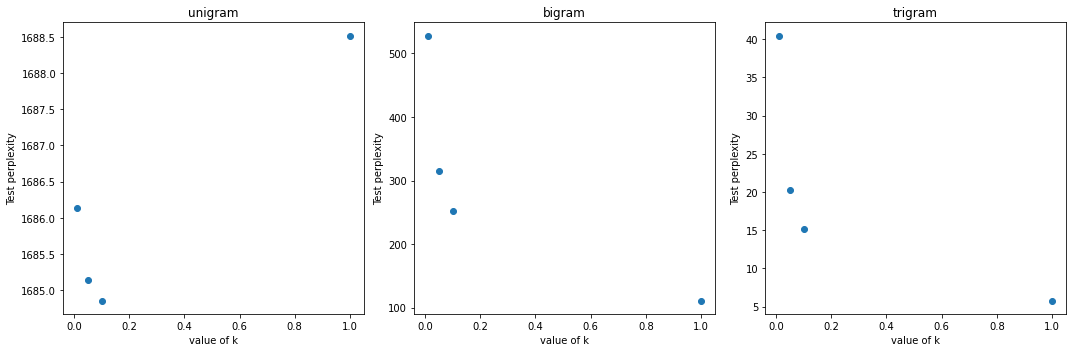

In [18]:
import matplotlib.pyplot as plt
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15, 5))
x=[1,.1,.05,.01]
ax1.scatter(x, unigram_test_perplexity)
ax1.set_title('unigram')
ax1.set_xlabel('value of k')
ax1.set_ylabel('Test perplexity')
ax2.scatter(x, bigram_test_perplexity)
ax2.set_title('bigram')
ax2.set_xlabel('value of k')
ax2.set_ylabel('Test perplexity')
ax3.scatter(x, trigram_test_perpplexity)
ax3.set_title('trigram')
ax3.set_xlabel('value of k')
ax3.set_ylabel('Test perplexity')
fig.tight_layout()
plt.show()


In [19]:
#sys.exit(1)

## **Problem 2**



(Eisenstein Ch. 6) Using the Pytorch library, train an LSTM language model from the same Wikitext training corpus you used in problem 1. After each epoch of training, compute its perplexity on the Wikitext validation corpus. Stop training when the perplexity stops improving.

1. Fully describe your model architecture, hyperparameters, and experimental procedure.
2. After each epoch of training, compute your LM’s perplexity on the development data. Plot the development perplexity against # of epochs. Additionally, compute and report the perplexity on test
data.
3. Compare experimental results such as perplexity and training time between your n-gram and neural models (include smoothed and unsmooth n-grams). Provide graphs that demonstrate your
results.


**model architecture, hyperparameters, and experimental procedure.**
<br />First I consider an embedding layer, then LSTM layer and finally a linear layer. Below is the model architecture and hyper parameters. After building the neural model I compare this with the n-gram models

In [20]:
sequence_length = 10  # will take this many taken at a time for the LSTM model
batch_length = 100 # this is the batch size
num_of_epochs = 3 # epoch number. Could not go more than 3 epochs because the model is time consuming.

embedding_dim, hidden_dim, rnn_layers = 1024, 1024, 1 # embedding_dim is the first layer, next hidden_dim is the hidden states of LSTM, next rnn_layers is the number of LSTM unit 
#After the LSTM layer, a linear layer is used as the final layer.

learning_rate = 0.0001

In [21]:
## your code here
import numpy as np
from torchtext.vocab import vocab

#build vocabulary

train_list = train.split()
test_list = test.split()
validation_list = validation.split()

vocabulary = set(train_list + test_list + validation_list)

#vectorize the word

word2idx = {w:i for i, w in enumerate(vocabulary)}

#test
for i,word in enumerate(word2idx):
    print('  {:4s}: {:4d},'.format(word, word2idx[word]))
    if i == 5:
      break
    


  ์   :    0,
  29th:    1,
  Los :    2,
  timeI:    3,
  Dollar:    4,
  Circus:    5,


In [22]:
#vectorize the text
def vectorize_text(text):
  return [word2idx[word] for word in text]


vectorized_train_list = vectorize_text(train_list)
vectorized_test_list = vectorize_text(test_list)
vectorized_validation_list = vectorize_text(validation_list)
print(train_list[0:10])
print(vectorized_train_list[0:10])
print(word2idx['Valkyria'],word2idx['戦場のヴァルキュリア3'])

['Valkyria', 'Chronicles', 'III', 'Senjō', 'no', 'Valkyria', '3', 'Chronicles', 'Japanese', '戦場のヴァルキュリア3']
[6424, 27032, 22573, 25793, 3847, 6424, 31529, 27032, 17824, 14580]
6424 14580


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(0)

#creating training samples
def create_training_samples(sequence_length, vectorized_text,batch_length):
  starting_index = np.random.choice(len(vectorized_text)-1-sequence_length, batch_length)
  x = np.array([vectorized_text[i:i+sequence_length] for i in starting_index])
  y = np.array([vectorized_text[i+1:i+sequence_length+1] for i in starting_index])
  return torch.from_numpy(x),torch.from_numpy(y)


#test create_training_samples#
toy_x, toy_y = create_training_samples(5,vectorized_train_list[0:10],2)

print(toy_x)
print(toy_y)


tensor([[27032, 22573, 25793,  3847,  6424],
        [ 6424, 27032, 22573, 25793,  3847]])
tensor([[22573, 25793,  3847,  6424, 31529],
        [27032, 22573, 25793,  3847,  6424]])


In [24]:

#set up dataset for data loader
from torch.utils.data import Dataset, DataLoader
class Wikitext:
  def __init__(self,vectorized_text,sequence_length):
    self.vectorized_text = vectorized_text
    self.sequence_length = sequence_length
  def __len__(self):
    return len(self.vectorized_text) - self.sequence_length
  def __getitem__(self,idx):
    x = np.array(self.vectorized_text[idx:idx+self.sequence_length])
    y = np.array(self.vectorized_text[idx+1:idx+1+self.sequence_length])
    return (torch.from_numpy(x),torch.from_numpy(y))
    




wiki_datatest_train = Wikitext(vectorized_train_list,sequence_length)
wiki_datatest_validation = Wikitext(vectorized_validation_list,sequence_length)
wiki_datatest_test = Wikitext(vectorized_test_list,sequence_length)
train_loader = DataLoader(dataset=wiki_datatest_train, batch_size=batch_length)
validation_loader = DataLoader(dataset=wiki_datatest_validation, batch_size=batch_length)
test_loader = DataLoader(dataset=wiki_datatest_test, batch_size=batch_length)






In [25]:
#select device
if torch.cuda.is_available()==True:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


print(device)

cuda


In [26]:
#LSTM model#

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(0)
class LSTMModel(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocabulary_size, rnn_layers):
        super(LSTMModel, self).__init__()
        self.rnn_layers= rnn_layers
        self.hidden_size=hidden_dim
        self.word_embeddings = nn.Embedding(vocabulary_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim,rnn_layers,batch_first=True)
        self.last_layer = nn.Linear(hidden_dim, vocabulary_size)
        
    def forward(self, text,previous_state):
        embeds = self.word_embeddings(text)

      
      
      
        lstm_out,new_state = self.lstm(embeds,previous_state)

      

        lstm_out = lstm_out.reshape(lstm_out.size(0)*lstm_out.size(1), lstm_out.size(2)) #######
      

        last_layer = self.last_layer(lstm_out)   ######################
        return last_layer, new_state
    def setup_first_layer(self,batch_length):
        return (torch.zeros(self.rnn_layers, batch_length, self.hidden_size).to(device),
                torch.zeros(self.rnn_layers, batch_length, self.hidden_size).to(device))




      




      

In [27]:
vocabulary_size = len(vocabulary)

lstm_model = LSTMModel(embedding_dim, hidden_dim, vocabulary_size,rnn_layers).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)

In [28]:
#check the shape of the model
x, y = create_training_samples(sequence_length,vectorized_train_list, batch_length)
print(x.shape)
print(y.shape)
prev_state = lstm_model.setup_first_layer(batch_length)
print(prev_state[0].shape)
x=x.to(device)
pred,_ = lstm_model(x,prev_state)
print("Input shape:      ", x.shape)
print("Prediction shape: ", pred.shape)
print(len(prev_state))

torch.Size([100, 10])
torch.Size([100, 10])
torch.Size([1, 100, 1024])
Input shape:       torch.Size([100, 10])
Prediction shape:  torch.Size([1000, 34044])
2


In [29]:
yshaped = y.reshape(-1).to(device)
loss = criterion(pred,yshaped)

print(yshaped.shape)
print(loss)


torch.Size([1000])
tensor(10.4397, device='cuda:0', grad_fn=<NllLossBackward0>)


In [30]:

#train the model
from torch.nn.utils import clip_grad_norm_


#toy_wiki_datatest = Wikitext(vectorized_train_list[0:10],sequence_length)
#toy_train_loader = DataLoader(dataset=toy_wiki_datatest,batch_size=batch_length)




epoch_train_time=[]
epoch_train_perplexitiy=[]
epoch_validation_perplexitiy=[]
epoch_test_perplexitiy=[]

for epoch in range(num_of_epochs):
  start_time = time.time()
  lstm_model.train()
  current_epoch_train_loss = 0
  batch_number = 1
  for x,y in train_loader:
      x=x.to(device)
      y=y.to(device)
      #print(x,y)
      prev_states = lstm_model.setup_first_layer(batch_length)
      optimizer.zero_grad()
      pred,new_state = lstm_model(x,prev_states)

      new_state[0].detach() ###############################
      new_state[1].detach() ###############################

      yshaped = y.reshape(-1).to(device)
      loss = criterion(pred,yshaped)
      current_epoch_train_loss+=loss.item()
      loss.backward()
      clip_grad_norm_(lstm_model.parameters(), 0.5)
      optimizer.step()
      #print('epoch=',epoch,' loss=',loss.item(),' perplexity=',pow(2,loss.item()),' batch_number=',batch_number," total=",len(train_loader))
      batch_number+=1
      if batch_number==len(train_loader): break

  end_time = time.time()
  
  #print("train loss=",current_epoch_train_loss/ len(train_loader),' perplexity=',train_perplexity,' time=',start-end)


  lstm_model.eval()
  current_epoch_valid_loss = 0
  batch_number = 1
 
  for x,y in validation_loader:
    x=x.to(device)
    y=y.to(device)
    pred,new_state = lstm_model(x,prev_states)
    yshaped = y.reshape(-1).to(device)
    loss = criterion(pred,yshaped)
    current_epoch_valid_loss+=loss.item()
    #print("validation loss=",loss.item(),' perplexity=',pow(2,loss.item()),' batch_number=',batch_number," total=",len(validation_loader))
    batch_number+=1
    if batch_number==len(validation_loader): break
  



        
  train_perplexity = pow(2,current_epoch_train_loss/ len(train_loader))
  validation_perplexity = pow(2,current_epoch_valid_loss/len(validation_loader))
  #test_perplexity = pow(2,current_epoch_test_loss/len(test_loader))

  epoch_train_perplexitiy.append(train_perplexity)
  epoch_validation_perplexitiy.append(validation_perplexity)
  #epoch_test_perplexitiy.append(test_perplexity)
    
  time_elapse = end_time-start_time  
  epoch_train_time.append(time_elapse)
  print('Epoch= ',epoch, ' time taken=',time_elapse)
  print('Epoch= ',epoch,'  Training Loss= ',current_epoch_train_loss / len(train_loader),'  Validation Loss= ',current_epoch_valid_loss / len(validation_loader)) #,'  Test Loss= ',current_epoch_test_loss/ len(test_loader))
  print('Epoch= ',epoch,'  Training perplexity= ',train_perplexity,'  Validation perplexity= ',validation_perplexity) #,'  Test perplexity= ',test_perplexity)
  



    





Epoch=  0  time taken= 907.3569383621216
Epoch=  0   Training Loss=  7.042280877686578   Validation Loss=  6.62493659917859
Epoch=  0   Training perplexity=  131.80678958975895   Validation perplexity=  98.69715537568229
Epoch=  1  time taken= 906.8061554431915
Epoch=  1   Training Loss=  6.195534879244679   Validation Loss=  6.47431256916212
Epoch=  1   Training perplexity=  73.28951333193946   Validation perplexity=  88.91239004366022
Epoch=  2  time taken= 907.1368417739868
Epoch=  2   Training Loss=  5.742504903783129   Validation Loss=  6.425922004036281
Epoch=  2   Training perplexity=  53.53850332717728   Validation perplexity=  85.97957083428501


In [31]:
  #test the model
lstm_model.eval()
current_epoch_test_loss = 0
batch_number = 1
for x,y in test_loader:
    x=x.to(device)
    y=y.to(device)
    pred,new_state = lstm_model(x,prev_states)
    yshaped = y.reshape(-1).to(device)
    loss = criterion(pred,yshaped)
    current_epoch_test_loss+=loss.item()
    #print("test loss=",loss.item(),' perplexity=',pow(2,loss.item()),' batch_number=',batch_number," total=",len(test_loader))
    batch_number+=1
    if batch_number==len(test_loader): break
 

In [32]:
print(epoch_train_time)
print(epoch_train_perplexitiy)
print(epoch_validation_perplexitiy)


[907.3569383621216, 906.8061554431915, 907.1368417739868]
[131.80678958975895, 73.28951333193946, 53.53850332717728]
[98.69715537568229, 88.91239004366022, 85.97957083428501]


**Development perplexity vs number of epoch**

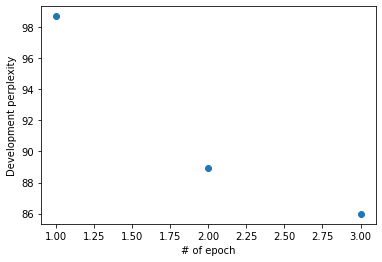

In [33]:
#import matplotlib.pyplot as plt
#epoch_validation_perplexitiy = [68.8583711783414, 75.50595363432315]
x = range(1,len(epoch_validation_perplexitiy)+1)
 
y =epoch_validation_perplexitiy
 
plt.scatter(x, y)
plt.xlabel('# of epoch')
plt.ylabel('Development perplexity')
 
# To show the plot
plt.show()

**Test perplexity**

In [34]:
test_perplexity = pow(2,current_epoch_test_loss/len(test_loader)) 
print(test_perplexity)

84.29105215535381


**Comparison bwteen neural model and ngrams**
<br />Below the comparison of test perplexity between  neural model and ngrams are provided. Neural model is better for both unigram and bigram. However, trigram out performs neural model. I think this is because of hyperparameters tuning and small epoch numbers. If we do a grid search, it neural model may provide better result.


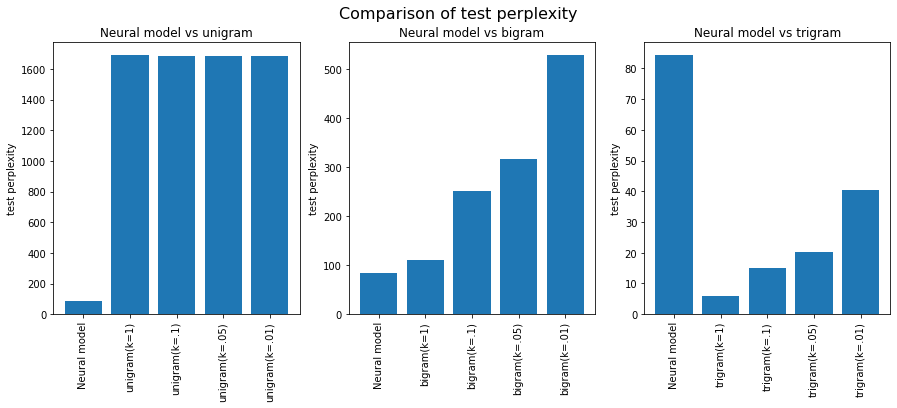

In [35]:
#test_perplexity=86.5595848981394
#epoch_train_time=[908.010972738266, 908.2025105953217]
fig, ( ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15, 5))
x=['Neural model','unigram(k=1)','unigram(k=.1)','unigram(k=.05)','unigram(k=.01)']
y=[test_perplexity]+unigram_test_perplexity
ax1.bar(x,y)
ax1.set_title('Neural model vs unigram')

x=['Neural model','bigram(k=1)','bigram(k=.1)','bigram(k=.05)','bigram(k=.01)']
y=[test_perplexity]+bigram_test_perplexity
ax2.bar(x,y)
ax2.set_title('Neural model vs bigram')



x=['Neural model','trigram(k=1)','trigram(k=.1)','trigram(k=.05)','trigram(k=.01)']
y=[test_perplexity]+trigram_test_perpplexity
ax3.bar(x,y)
ax3.set_title('Neural model vs trigram')

ax1.set_ylabel('test perplexity')
ax2.set_ylabel('test perplexity')
ax3.set_ylabel('test perplexity')

ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)

fig.suptitle('Comparison of test perplexity', fontsize=16)

plt.show()




Though neural model provides promising result, it is time consuming. Below is the comarison between neural model and ngrams trainging time 

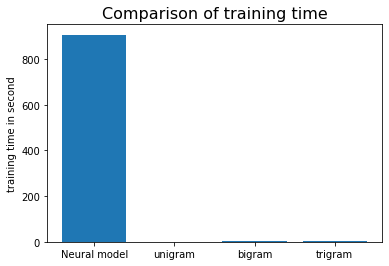

In [36]:

epoch_train_time_mean=sum(epoch_train_time) / len(epoch_train_time)
ngram_time
plt.bar(['Neural model','unigram','bigram','trigram'],[epoch_train_time_mean]+ngram_time)
plt.ylabel('training time in second')
plt.title('Comparison of training time',fontsize=16)
plt.show()

In conclusion, though Neural model takes time, with correct hyperparameters and computational resource it is very promising. For example, if I better tune the hyper parameters (using grid search, random search or bayesian technique) and run more epochs, the neural model will be better hopefully. Dropout layer can also be used to overcome overfitting. 